# Day 4
## 
## Mariam Arzumanyan

In [1]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.mode.chained_assignment = None
# gives timestamp of today's date at the time of cell execution
today = pd.to_datetime('today')
today 

Timestamp('2023-02-14 17:14:13.761509')

# Question 1: Examine and present the main characteristics of the data.

### Import and clean the data

In [2]:
X=pd.read_csv('C:\\Users\\arzum\\Downloads\\X.csv',index_col=[0], low_memory=False)
Y=pd.read_csv('C:\\Users\\arzum\\Downloads\\Y.csv',index_col=[0], low_memory=False, header=None)

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9998 non-null   float64
 1   1       9997 non-null   float64
 2   2       9999 non-null   float64
 3   3       9999 non-null   float64
 4   4       9989 non-null   float64
dtypes: float64(5)
memory usage: 468.8 KB


In [4]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       10000 non-null  float64
dtypes: float64(1)
memory usage: 156.2 KB


#### At first glance, it can be noticed that variables in X have missing values, and X has one less entry than Y. This needs to be dealt with before proceeding. All missing values will be filled with the column's average, and another row will be added to vector X, which is again the column's average. All duplicate values should be dropped, but in this case there are none.

In [5]:
# dropping all duplicate values
X.drop_duplicates(inplace=True)

In [6]:
X['0'].loc[10000]= X['0'].mean()
X['1'].loc[10000]= X['1'].mean()
X['2'].loc[10000]= X['2'].mean()
X['3'].loc[10000]= X['3'].mean()
X['4'].loc[10000]= X['4'].mean()

In [7]:
X['0'].fillna(X['0'].mean(), inplace=True)
print('Number of missing values in the first column:', X['0'].isna().sum())
X['1'].fillna(X['1'].mean(), inplace=True)
print('Number of missing values in the second column:', X['1'].isna().sum())
X['2'].fillna(X['2'].mean(), inplace=True)
print('Number of missing values in the third column:', X['2'].isna().sum())
X['3'].fillna(X['3'].mean(), inplace=True)
print('Number of missing values in the fourth column:', X['3'].isna().sum())
X['4'].fillna(X['4'].mean(), inplace=True)
print('Number of missing values in the fifth column:',X['4'].isna().sum())
print('Number of missing values in the Y:',Y[1].isna().sum())

Number of missing values in the first column: 0
Number of missing values in the second column: 0
Number of missing values in the third column: 0
Number of missing values in the fourth column: 0
Number of missing values in the fifth column: 0
Number of missing values in the Y: 0


#### The summary statistics of the data.

In [8]:
print(X.describe())

                  0             1             2             3             4
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean       1.019668      0.049666      0.105662      0.336831      1.039732
std      100.036322      5.459886     10.024118     59.780242      2.128940
min       -7.654205    -19.706080     -3.726699  -3001.334527     -7.265781
25%       -1.303321     -3.630220     -0.597153     -3.907858     -0.402370
50%        0.012648      0.049666      0.008189      0.050970      1.032799
75%        1.359666      3.699497      0.613171      4.135878      2.474292
max    10001.660383     19.256933    998.329754   5134.656375      9.896021


In [9]:
print(Y.describe())

                  1
count  10000.000000
mean       1.183616
std       54.743893
min     -712.340073
25%      -17.473542
50%        1.943772
75%       21.275091
max      681.761316


### Initial examination of the data. Plotting histograms to see the distribution of the data, whether there are outliers. 

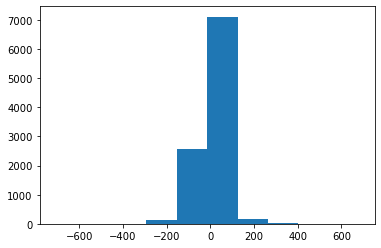

In [10]:
plt.hist(Y)
plt.show()

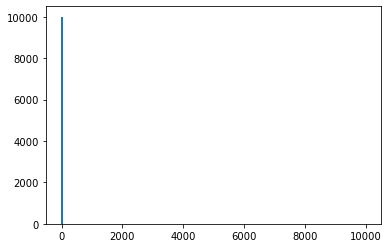

In [11]:
plt.hist(X['0'], bins=170)
plt.show()

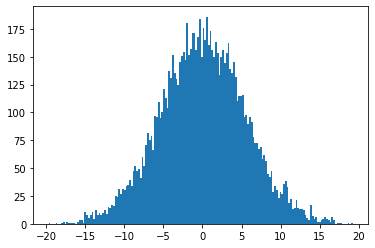

In [12]:
plt.hist(X['1'], bins=170)
plt.show()

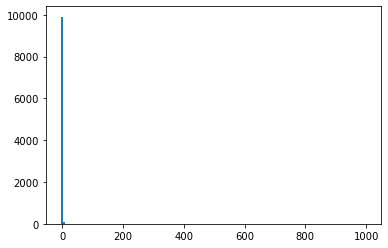

In [13]:
plt.hist(X['2'], bins=170)
plt.show()

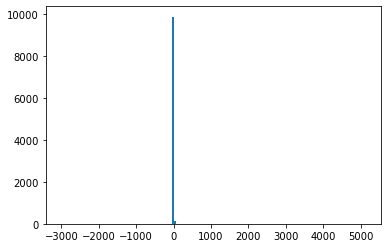

In [14]:
plt.hist(X['3'], bins=170)
plt.show()

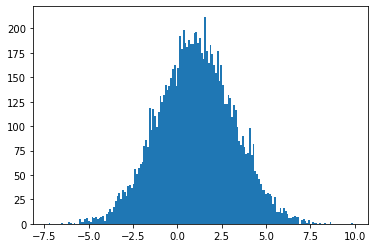

In [15]:
plt.hist(X['4'], bins=170)
plt.show()

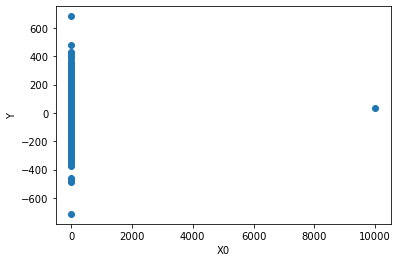

In [16]:
plt.scatter(X['0'],Y)
plt.xlabel('X0')
plt.ylabel('Y')
plt.show()

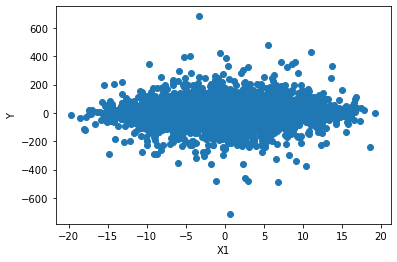

In [17]:
plt.scatter(X['1'],Y)
plt.xlabel('X1')
plt.ylabel('Y')
plt.show()

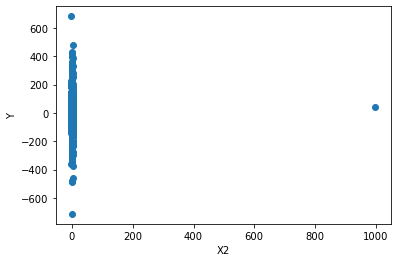

In [18]:
plt.scatter(X['2'],Y)
plt.xlabel('X2')
plt.ylabel('Y')
plt.show()

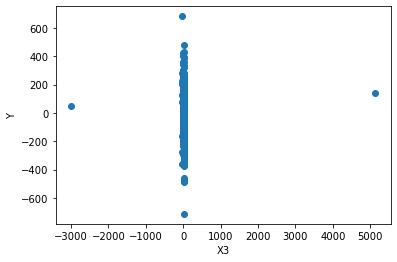

In [19]:
plt.scatter(X['3'],Y)
plt.xlabel('X3')
plt.ylabel('Y')
plt.show()

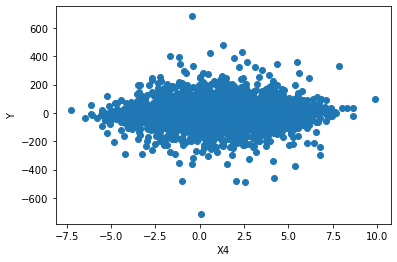

In [20]:
plt.scatter(X['4'],Y)
plt.xlabel('X4')
plt.ylabel('Y')
plt.show()

#### First, third, and fourth columns have outliers. They need to be inspected and removed.

In [21]:
#Find the outlier's index, and replace with the average. 
index_0 = X[X['0']==X['0'].max()].index
# Make sure unique element
index_0

Int64Index([2315], dtype='int64')

In [22]:
X['0'].loc[index_0]=X['0'].mean()

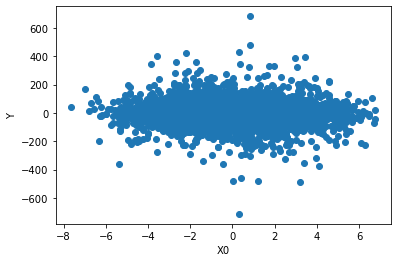

In [23]:
#Check the scatter plot again.
plt.scatter(X['0'],Y)
plt.xlabel('X0')
plt.ylabel('Y')
plt.show()

In [24]:
#Find the outlier's index, and replace with the average. 
index_2 = X[X['2']==X['2'].max()].index
# Make sure unique element
index_2

Int64Index([19], dtype='int64')

In [25]:
X['2'].loc[index_2]=X['2'].mean()

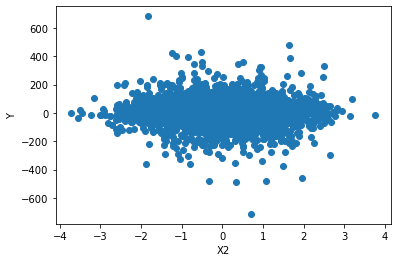

In [26]:
#Check the scatter plot again.
plt.scatter(X['2'],Y)
plt.xlabel('X2')
plt.ylabel('Y')
plt.show()

In [27]:
#Find the outlier's index, and replace with the average. 
index_3 = X[X['3']==X['3'].max()].index
# Make sure unique element
index_3

Int64Index([7321], dtype='int64')

In [28]:
X['3'].loc[index_3]=X['3'].mean()

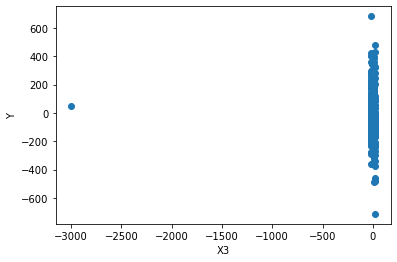

In [29]:
#Check the scatter plot again.
plt.scatter(X['3'],Y)
plt.xlabel('X3')
plt.ylabel('Y')
plt.show()

In [30]:
# For this particular variable, there is a minimum outlier. Repeat the same procedure with the minimum.
#Find the outlier's index, and replace with the average. 
index_3 = X[X['3']==X['3'].min()].index
# Make sure unique element
index_3

Int64Index([7853], dtype='int64')

In [31]:
X['3'].loc[index_3]=X['3'].mean()

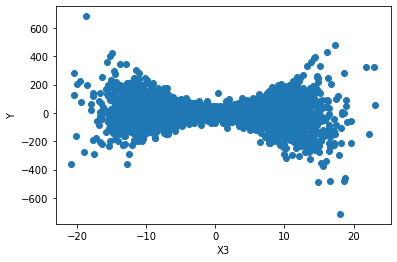

In [32]:
#Check the scatter plot again.
plt.scatter(X['3'],Y)
plt.xlabel('X3')
plt.ylabel('Y')
plt.show()

### Next, we want to inspect the covariance and correlation between independent variables.

In [33]:
cov_matrix=pd.DataFrame.cov(X)
cov_matrix

,0,1,2,3,4
0,3.983705,-3.266147,0.353937,3.477695,-0.759306
1,-3.266147,29.810357,1.966340,6.415188,10.305376
2,0.353937,1.966340,0.817880,1.560531,1.154070
3,3.477695,6.415188,1.560531,36.151271,2.972742
4,-0.759306,10.305376,1.154070,2.972742,4.532387


In [34]:
corr_matrix=pd.DataFrame.corr(X)
corr_matrix

,0,1,2,3,4
0,1.000000,-0.299715,0.196082,0.289792,-0.178694
1,-0.299715,1.000000,0.398227,0.195418,0.886578
2,0.196082,0.398227,1.000000,0.286989,0.599410
3,0.289792,0.195418,0.286989,1.000000,0.232237
4,-0.178694,0.886578,0.599410,0.232237,1.000000


In [35]:
corr_matrix=pd.DataFrame.corr(X)
corr_matrix

,0,1,2,3,4
0,1.000000,-0.299715,0.196082,0.289792,-0.178694
1,-0.299715,1.000000,0.398227,0.195418,0.886578
2,0.196082,0.398227,1.000000,0.286989,0.599410
3,0.289792,0.195418,0.286989,1.000000,0.232237
4,-0.178694,0.886578,0.599410,0.232237,1.000000


### The second and the last columns are correlated. This raises a potential issue of multicollinearity.

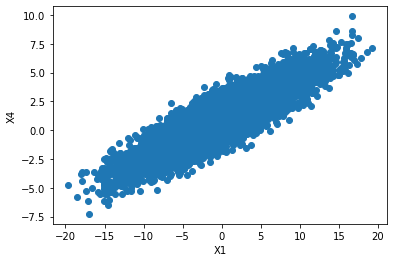

In [36]:
#Check the scatter plot for collinearity between columns 1 and 4.
plt.scatter(X['1'],X['4'])
plt.xlabel('X1')
plt.ylabel('X4')
plt.show()

In [37]:
import statsmodels.api as sm
regressor_OLS = sm.OLS(endog = X['1'], exog = X['4']).fit()
print(regressor_OLS.summary())


                                 OLS Regression Results                                
Dep. Variable:                      1   R-squared (uncentered):                   0.641
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                          1.785e+04
Date:                Tue, 14 Feb 2023   Prob (F-statistic):                        0.00
Time:                        17:14:18   Log-Likelihood:                         -26042.
No. Observations:               10000   AIC:                                  5.209e+04
Df Residuals:                    9999   BIC:                                  5.209e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### The second and fourth columns are positively correlated by a coefficient of 1.85.

## Forecasting Model 


## 2. Propose a forecasting model for Y using the variables in X and explain its properties.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

#### Split the data into train and test to measure the model performance.

In [39]:
# For the Y variable, make sure it is an array of the form (n,). 
X_train, X_test, y_train, y_test=train_test_split(X, Y[1], test_size=0.8)
y_train.shape

(2000,)

In [40]:
import statsmodels.api as sm
regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
print(regressor_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                      1   R-squared (uncentered):                   0.042
Model:                            OLS   Adj. R-squared (uncentered):              0.040
Method:                 Least Squares   F-statistic:                              17.70
Date:                Tue, 14 Feb 2023   Prob (F-statistic):                    3.36e-17
Time:                        17:14:19   Log-Likelihood:                         -10775.
No. Observations:                2000   AIC:                                  2.156e+04
Df Residuals:                    1995   BIC:                                  2.159e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [41]:
# Fit the regressor using the training data
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_)


[ 2.26378015  1.55203126 -2.59497703 -1.67819071  0.54147552]


In [42]:
y_pred=reg.predict(X_test)
print(r2_score(y_test, y_pred))
print(explained_variance_score(y_test, y_pred))

0.037138066460696284
0.037174884866970626


### Based on the $R^2$ score, it can be seen that the linear model is not very good at predicting this data.

### Similarly, we can check the cross-validation results.

In [43]:
cv=cross_val_score(reg, X, Y[1],cv=5)
print(cv)

[0.016784   0.04948039 0.03467022 0.05052653 0.02885316]


## Alternative Model and Variable selection
### Ridge Regression, Lasso, Elastic Net, Huber Regression, TheilSenRegressor, RANSACRegressor

In [44]:
ridge = Ridge()
ridge.fit(X, Y[1])

print(ridge.coef_)
cv_ridge=cross_val_score(ridge, X, Y[1],cv=5)
print(cv_ridge)

[ 1.70745192  1.22809525 -1.3868207  -1.80471419  0.54908255]
[0.016784   0.04947999 0.03467173 0.05052622 0.02885348]


In [45]:
lasso = Lasso()
lasso.fit(X, Y[1])
print(lasso.coef_)
cv_lasso=cross_val_score(lasso, X, Y[1],cv=5)
print(cv_lasso)

[ 1.16235723  1.21873766 -0.         -1.73767014  0.        ]
[0.01689367 0.04801279 0.03876244 0.0490149  0.02950856]


In [46]:
elas = ElasticNet(random_state=437)
elas.fit(X_train, y_train)
print(elas.coef_)

[ 1.52873272  1.47539603 -0.49001908 -1.60437014  0.        ]


In [47]:
X1=X[['0','1', '2', '3']]
# Fit the regressor using the training data
reg = LinearRegression()
reg.fit(X1, Y[1])
print(reg.coef_)


[ 1.70372613  1.39236792 -1.00531939 -1.80482835]


In [48]:
cv=cross_val_score(reg, X1, Y[1],cv=5)
print(cv)


[0.01659771 0.04964673 0.03458194 0.05071205 0.02873103]


Cross validation scores above show that linear models have very poor performance in explaining and forecasting this data. 

### Question 3: Standard linear models are often inadequate in practical forecasting applications if the unobservable error terms (the noise) are non-spherical and/or heavy tailed. Can you explain why? In light of this consideration can you improve the modeling from (2)?

### The linear regression models make a set of assumptions about the underlying data. One of the most important assumptions is that the unobservable error is normally distributed with zero mean and constant variance. If the normality condition is not satisfied, an alternative distribution assumption should be made. However, linear regression will work even with heavy tails, but as shown in the models above, it performs quite poorly. 

### Question 4:4.	Evaluate the quality of your models and of their parameter estimates. Which one produces the best forecast? Interpret why.

In [49]:
## Huber regressor 
from sklearn.linear_model import HuberRegressor

In [50]:
huber = HuberRegressor().fit(X, Y[1])
cv=cross_val_score(huber, X, Y[1],cv=5)
print(cv)

[0.01974309 0.04954288 0.03688772 0.05006634 0.029501  ]


In [51]:
from sklearn.linear_model import TheilSenRegressor
reg = TheilSenRegressor(random_state=0).fit(X, Y[1])
cv=cross_val_score(reg, X, Y[1],cv=5)
print(cv)

[0.01967411 0.04458335 0.03730033 0.04816173 0.02906143]


In [52]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(max_iter=500).fit(X, Y[1])
cv=cross_val_score(sgd, X, Y[1],cv=5)
print(cv)

[ 0.01594118  0.00919533 -0.41818474  0.00485922 -0.02699544]


In [53]:
from sklearn import svm
regr = svm.SVR()
regr.fit(X, Y[1])
cv=cross_val_score(regr, X, Y[1],cv=5)
print(cv)

[0.02199365 0.03704482 0.03598184 0.03952995 0.01886597]


In [54]:
from sklearn.linear_model import RANSACRegressor
reg = RANSACRegressor(random_state=42)
reg.fit(X, Y[1])
cv=cross_val_score(reg, X, Y[1],cv=5)
print(cv)

[-0.02247978 -0.3741577  -0.10276949 -0.10299021 -0.24108787]


In [55]:
reg = RANSACRegressor(random_state=42)
reg.fit(X1, Y[1])
cv=cross_val_score(reg, X, Y[1],cv=5)
print(cv)

[-0.02247978 -0.3741577  -0.10276949 -0.10299021 -0.24108787]


### Conclusion

###  The $R^2$ and cross-validation scores are used to evaluate the model performance. The chosen models have poor performance and need to produce better forecasts. The robust models, such as support vector machines, did not perform well. The models do not predict the model well because data was generated through a specific model, making modeling assumptions case-dependent. There might be two underlying causes: variable and model selection. Endogenous variable Y has no linear relationship with exogenous variables except in the fourth column. I would recommend using tree-based models, and maybe they will perform better.